In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:/Dig/diabeties.txt", sep=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# In Glucose we dont have 0 as value so we will replace it with median values, if !0 than the value will be same

data['Glucose'] = np.where(data['Glucose']==0, data['Glucose'].median(), data['Glucose'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [4]:
# In Glucose we dont have 0 as value so we will replace it with median values, if !0 than the value will be same

data['Insulin'] = np.where(data['Insulin']==0, data['Insulin'].median(), data['Insulin'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,0,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [5]:
# In Glucose we dont have 0 as value so we will replace it with median values, if !0 than the value will be same

data['SkinThickness'] = np.where(data['SkinThickness']==0, data['SkinThickness'].median(), data['SkinThickness'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [6]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.0,30.5,33.6,0.627,50
1,1,85.0,66,29.0,30.5,26.6,0.351,31
2,8,183.0,64,23.0,30.5,23.3,0.672,32
3,1,89.0,66,23.0,94.0,28.1,0.167,21
4,0,137.0,40,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63
764,2,122.0,70,27.0,30.5,36.8,0.340,27
765,5,121.0,72,23.0,112.0,26.2,0.245,30
766,1,126.0,60,23.0,30.5,30.1,0.349,47


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Random forest with n_estimatior = 10 but by default is 100

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
pred1 = rf_classifier.predict(X_test)

In [10]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,pred1))
print(accuracy_score(y_test,pred1))
print(classification_report(y_test,pred1))

[[88 11]
 [33 22]]
0.7142857142857143
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        99
           1       0.67      0.40      0.50        55

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.71      0.69       154



The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.

max_depth = maximum number of levels allowed in each tree.

max_features = maximum number of features considered when splitting a node.

min_samples_leaf = minimum number of samples which can be stored in a tree leaf.

min_samples_split = minimum number of samples necessary in a node to cause node splitting.

n_estimators = number of trees in the ensamble.

In [13]:
# Manual Hyerparameter tunning

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, criterion='gini',
                                      max_features='sqrt', min_samples_leaf=10, random_state=100).fit(X_train, y_train)
pred2 = model.predict(X_test)


print(confusion_matrix(y_test,pred2))
print(accuracy_score(y_test,pred2))
print(classification_report(y_test,pred2))

[[87 12]
 [28 27]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        99
           1       0.69      0.49      0.57        55

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



## What to choose first 

## RandomsearchCV or GridsearchCV

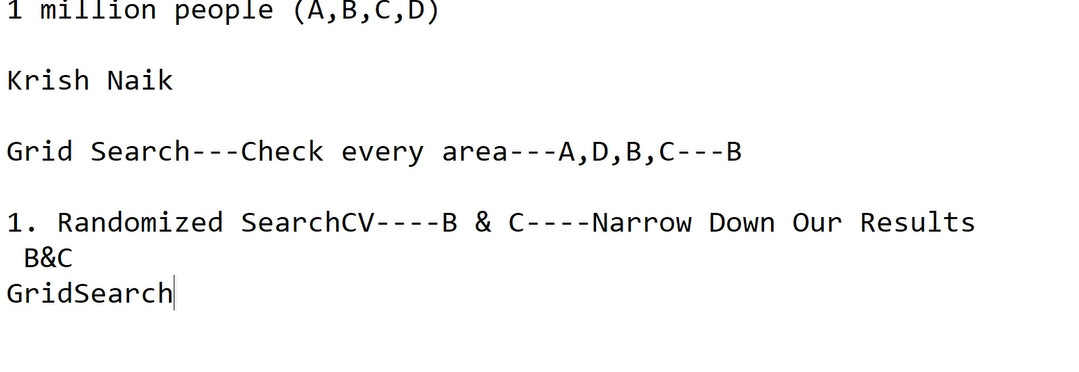

## Always first do RandomseachCV than GridseachCV

## Random Search CV

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [15]:
rf = RandomForestClassifier()
rf_random_cv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100,
                                  cv=3, verbose=1, random_state=100, n_jobs=-1)

rf_random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
             

In [16]:
rf_random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 560,
 'criterion': 'gini'}

In [17]:
rf_random_cv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
             

In [18]:
rf_random_cv.best_estimator_

RandomForestClassifier(max_depth=560, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=600)

In [19]:
best_random_grid = rf_random_cv.best_estimator_

In [20]:
from sklearn.metrics import accuracy_score
y_pred = best_random_grid.predict(X_test)



print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85 14]
 [23 32]]
0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



## Grid Search CV

In [21]:
rf_random_cv.best_estimator_

RandomForestClassifier(max_depth=560, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=600)

In [23]:
rf_randomcv = rf_random_cv

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [560], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [400, 500, 600, 700, 800]}


In [28]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)
                           
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  6.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [560],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [400, 500, 600, 700, 800]},
             verbose=1)

In [29]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=560, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=400)

In [30]:
best_grid = grid_search.best_estimator_

best_grid

RandomForestClassifier(max_depth=560, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=400)

In [31]:
from sklearn.metrics import accuracy_score
y_pred = best_grid.predict(X_test)



print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[88 11]
 [24 31]]
0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



# Automated Hyperparameter Tunning

Automated Hyperparameter Tuning can be done by using techniques such as

- Bayesian Optimization
- Gradient Descent
- Evolutionary Algorithms

<b>Bayesian Optimization</b>

Bayesian optimization uses probability to find the minimum of a function. The final aim is to find the input value to a function which can gives us the lowest possible output value.It usually performs better than random,grid and manual search providing better performance in the testing phase and reduced optimization time. In Hyperopt, Bayesian Optimization can be implemented giving 3 three main parameters to the function fmin.

- Objective Function = defines the loss function to minimize.
- Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).
- Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [32]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [33]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

space

{'criterion': <hyperopt.pyll.base.Apply at 0x23e26955ec8>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x23e2650f688>,
 'max_features': <hyperopt.pyll.base.Apply at 0x23e2650ff48>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x23e2645fdc8>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x23e264641c8>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x23e26464188>}

In [34]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [35]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|██████████| 80/80 [09:18<00:00,  6.99s/trial, best loss: -0.7720778355324537]


{'criterion': 1,
 'max_depth': 990.0,
 'max_features': 2,
 'min_samples_leaf': 0.05127513119781077,
 'min_samples_split': 0.00021254920332691805,
 'n_estimators': 5}

In [36]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])


gini
log2
1300


In [37]:
best['min_samples_leaf']

0.05127513119781077

In [38]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[89 10]
 [29 26]]
0.7467532467532467
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.72      0.47      0.57        55

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154

